### Creating a Machine Learning model to determine the quality of the wine

*We will build a supervised machine learning model to predict the color of wines whether the wine is white or red in color* 

#### Importing libraries

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#### Reading the white wine dataset

In [5]:
# Reading the dataset

data_dir = "data"
white_wine_data_dir = f"{data_dir}/white.csv"
red_wine_data_dir = f"{data_dir}/red.csv"


df1 = pd.read_csv(white_wine_data_dir, sep=';')
df2 = pd.read_csv(red_wine_data_dir, sep=';')


In [6]:
# Adding a color column to each dataset

df1['color'] = 'white'
df2['color'] = 'red'

In [7]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [8]:
df1.shape

(4898, 13)

In [9]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [10]:
df2.shape

(1599, 13)

*We will concatenate the datasets of white and red wines*

In [11]:
df = pd.concat([df1, df2])

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [13]:
df.shape

(6497, 13)

#### Description of the dataset

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


#### Retrieving information about the dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


#### Unique colors in the dataset

In [16]:
df['color'].unique()

array(['white', 'red'], dtype=object)

In [17]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

#### Checking if there is any missing value in the dataset

In [18]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

*We observe there are no missing values in the dataset*

#### Identifying and removing duplicate rows in the dataset

In [19]:
df[df.duplicated(['fixed acidity', 'volatile acidity', 'citric acid', 
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
      'pH', 'sulphates', 'alcohol'])==True].shape

(1184, 13)

*There are **1184** duplicate rows in the dataset*

In [20]:
df = df[df.duplicated(['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])==False]

In [21]:
df.shape

(5313, 13)

*The duplicate rows have been removed*

#### Defining function to create boxplots and distplots

In [22]:
'''
def create_boxplots_distplots(dataset):
    features = [feature for feature in dataset.columns if feature != 'color']
    for feature in features:
        plt.figure(figsize=(10,7))
        plt.subplot(2,2,1)
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.boxplot(x=dataset['color'], y=dataset[feature])
        plt.subplot(2,2,3)
        plt.hist(dataset[feature])
        plt.xlabel(feature)
        plt.subplot(2,2,4)
        sns.distplot(dataset[feature].dropna())
        plt.show()
    
create_boxplots_distplots(df)
'''

"\ndef create_boxplots_distplots(dataset):\n    features = [feature for feature in dataset.columns if feature != 'color']\n    for feature in features:\n        plt.figure(figsize=(10,7))\n        plt.subplot(2,2,1)\n        dataset.boxplot(column=feature)\n        plt.ylabel(feature)\n        plt.title(feature)\n        plt.subplot(2,2,2)\n        sns.boxplot(x=dataset['color'], y=dataset[feature])\n        plt.subplot(2,2,3)\n        plt.hist(dataset[feature])\n        plt.xlabel(feature)\n        plt.subplot(2,2,4)\n        sns.distplot(dataset[feature].dropna())\n        plt.show()\n    \ncreate_boxplots_distplots(df)\n"

We can see from the boxplots that there are outliers. So we need to to handle these outliers.

In [23]:
df[(df['volatile acidity'] > 1.5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1299,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3,red


In [24]:
df = df.drop(df[(df['volatile acidity'] > 1.5)].index)

In [25]:
df[(df['volatile acidity'] > 1.5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [26]:
df[(df['citric acid'] > 1.20)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
745,7.4,0.20,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6,white
3152,7.6,0.25,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6,white


In [27]:
df = df.drop(df[(df['citric acid'] > 1.20)].index)

In [28]:
df[(df['citric acid'] > 1.20)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [29]:
df[(df['residual sugar'] > 60)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,white


In [30]:
df = df.drop(df[(df['residual sugar'] > 60)].index)

In [31]:
df[(df['residual sugar'] > 60)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [32]:
df[(df['chlorides'] > 0.6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
151,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4,red
258,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5,red


In [33]:
df = df.drop(df[(df['chlorides'] > 0.6)].index)

In [34]:
df[(df['chlorides'] > 0.6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [35]:
df[(df['free sulfur dioxide'] > 250)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4745,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white


In [36]:
df = df.drop(df[(df['free sulfur dioxide'] > 250)].index)

In [37]:
df[(df['free sulfur dioxide'] > 250)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [38]:
df[(df['total sulfur dioxide'] > 400)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [39]:
df = df.drop(df[(df['total sulfur dioxide'] > 400)].index)

In [40]:
df[(df['total sulfur dioxide'] > 400)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [41]:
df[(df['density'] > 1.005)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1653,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.0103,3.15,0.38,8.8,6,white


In [42]:
df = df.drop(df[(df['density'] > 1.0025)].index)

In [43]:
df[(df['density'] > 1.0025)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [44]:
df[(df['sulphates'] > 1.75)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
86,8.6,0.49,0.28,1.9,0.11,20.0,136.0,0.9972,2.93,1.95,9.9,6,red
92,8.6,0.49,0.29,2.0,0.11,19.0,133.0,0.9972,2.93,1.98,9.8,5,red


In [45]:
df = df.drop(df[(df['sulphates'] > 1.75)].index)

In [46]:
df[(df['sulphates'] > 1.75)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [47]:
df[(df['alcohol'] > 14.5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5,red


In [48]:
df = df.drop(df[(df['alcohol'] > 14.5)].index)

In [49]:
df[(df['alcohol'] > 14.5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [50]:
# Defining function to handle outliers
'''
#Using 3xIQR for features having extreme oultiers and high skewness
def remove_extreme_outliers(dataset, list_of_features):
    for feature in list_of_features:
        if feature != 'color':
            IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
            lower_bridge = dataset[feature].quantile(0.25) - IQR*(3)
            upper_bridge = dataset[feature].quantile(0.75) + IQR*(3)
            #print(lower_bridge, upper_bridge)
            dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
            if lower_bridge >=0:    
                dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

            
features = ['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol']
remove_extreme_outliers(df, features)
'''

"\n#Using 3xIQR for features having extreme oultiers and high skewness\ndef remove_extreme_outliers(dataset, list_of_features):\n    for feature in list_of_features:\n        if feature != 'color':\n            IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)\n            lower_bridge = dataset[feature].quantile(0.25) - IQR*(3)\n            upper_bridge = dataset[feature].quantile(0.75) + IQR*(3)\n            #print(lower_bridge, upper_bridge)\n            dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge\n            if lower_bridge >=0:    \n                dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge\n\n            \nfeatures = ['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol']\nremove_extreme_outliers(df, features)\n"

In [51]:
'''
#Using 1.5xIQR for features having not so extreme oultiers and low skewness
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        if feature != 'color':
            IQR = dataset[feature].quantile(0.75)-df[feature].quantile(0.25)
            lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
            upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
            #print(lower_bridge, upper_bridge)
            dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
            if lower_bridge >=0:
                dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge


features = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 'pH']    
remove_outliers(df, features)
'''

"\n#Using 1.5xIQR for features having not so extreme oultiers and low skewness\ndef remove_outliers(dataset, list_of_features):\n    for feature in list_of_features:\n        if feature != 'color':\n            IQR = dataset[feature].quantile(0.75)-df[feature].quantile(0.25)\n            lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)\n            upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)\n            #print(lower_bridge, upper_bridge)\n            dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge\n            if lower_bridge >=0:\n                dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge\n\n\nfeatures = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 'pH']    \nremove_outliers(df, features)\n"

In [52]:
#create_boxplots_distplots(df)

In [53]:
df.shape

(5284, 13)

*The univariate oultiers have been removed*

#### Plotting a count of number of samples for respective qualities

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

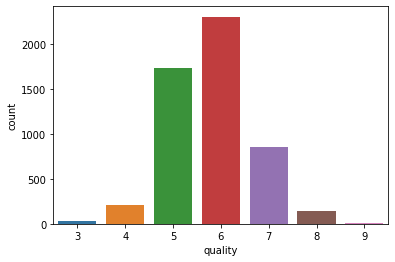

In [54]:
sns.countplot('quality', data=df)

In [55]:
df['quality'].value_counts()

6    2306
5    1740
7     853
4     205
8     147
3      28
9       5
Name: quality, dtype: int64

#### Pie chart showing distribution of qualities

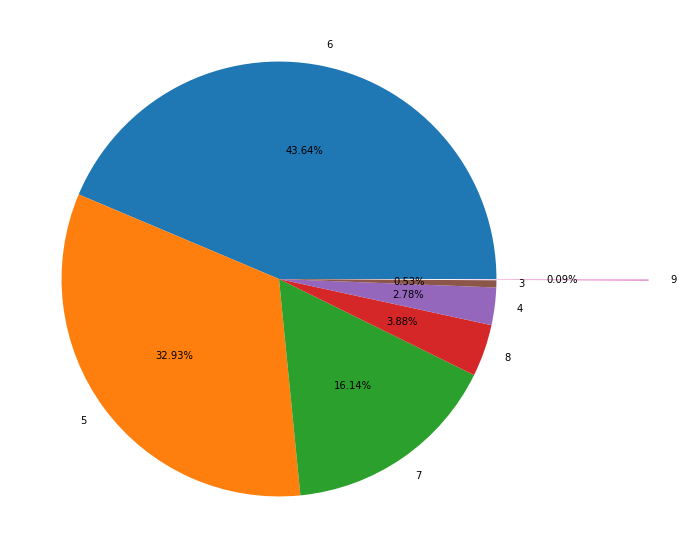

In [56]:
plt.figure(figsize=(15,10))
plt.pie(df['quality'].value_counts(), labels=df['quality'].unique(), autopct='%0.2f%%', explode=(0,0,0,0,0,0,0.7))
plt.show()

#### Determining correlation between the features of the dataset using a heatmap

<AxesSubplot:>

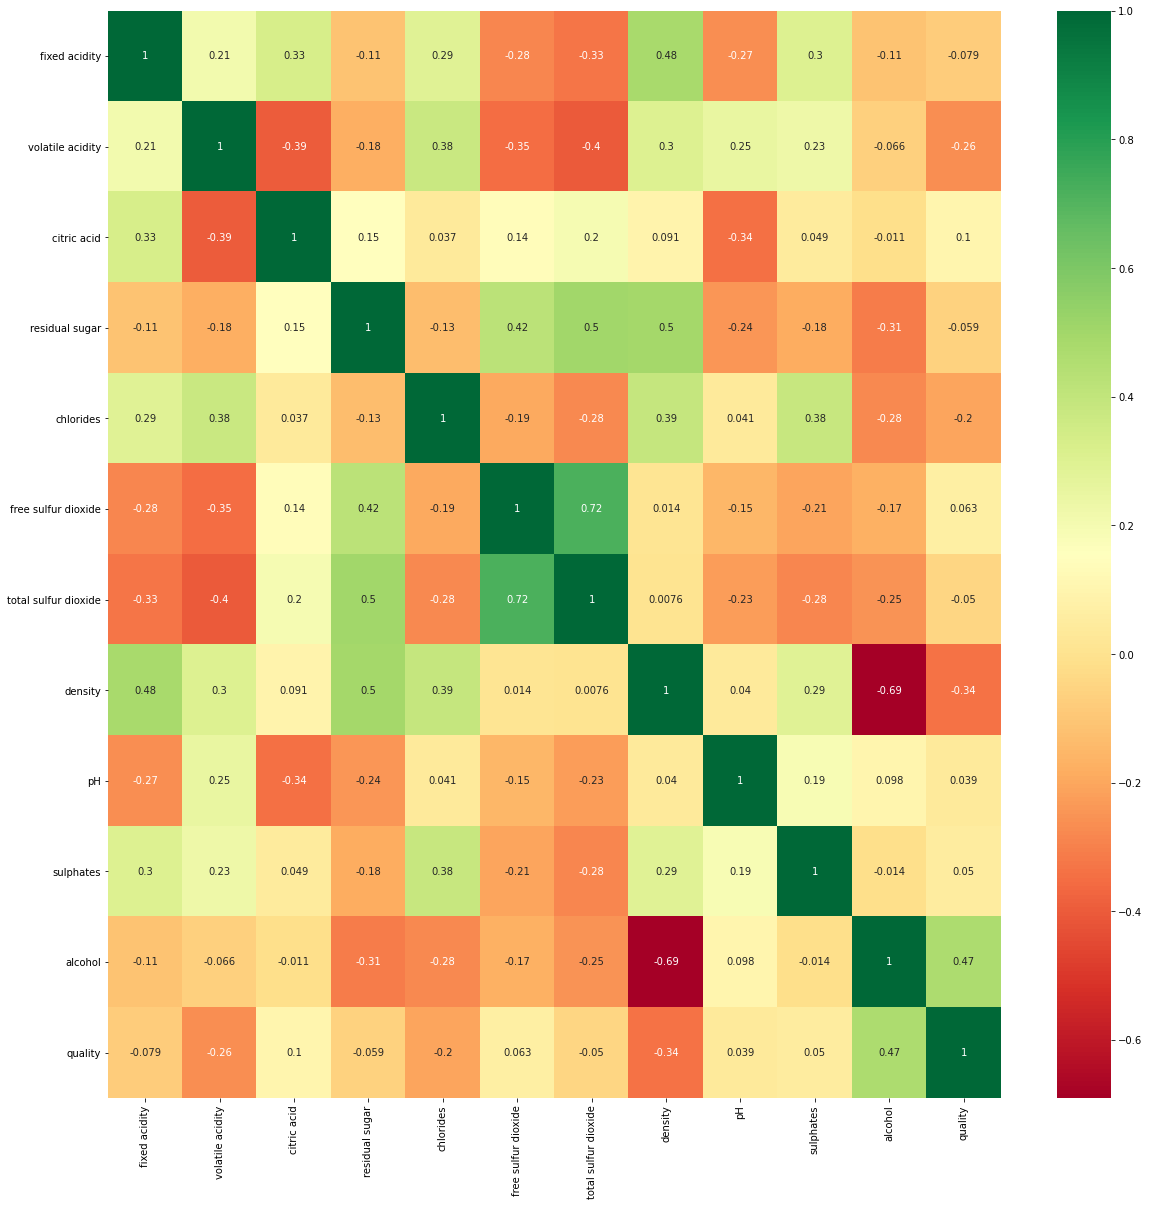

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

*In the above heatmap, if there are any 2 independent features that are highly correlated i.e. 80% or more, then we can drop 1 of those 2 features because both those features are serving the same purpose. There are no such features in the dataset that have a correlation of 80% or more. So we will not drop any features based on this.*

In [58]:
'''
b = sns.PairGrid(df)
b.map(plt.scatter)
'''

'\nb = sns.PairGrid(df)\nb.map(plt.scatter)\n'

#### Determining the number of unique values in each column of the dataset

In [59]:
df.nunique()

fixed acidity           103
volatile acidity        186
citric acid              87
residual sugar          312
chlorides               212
free sulfur dioxide     134
total sulfur dioxide    274
density                 990
pH                      108
sulphates               107
alcohol                 110
quality                   7
color                     2
dtype: int64

#### Plotting a scatterplot matrix of the independent features

In [60]:
#pd.plotting.scatter_matrix(df, alpha=0.1, figsize=(20,20), diagonal='hist', grid=True, )

In [61]:
'''
def create_relplot(dataset):
    features = [feature for feature in dataset.columns if feature != 'color']
    for feature in features:
        for bivariate_feature in features:
            if bivariate_feature != feature:
                plt.figure(figsize=(10,10))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue='quality')
                plt.show()


create_relplot(df)
'''

"\ndef create_relplot(dataset):\n    features = [feature for feature in dataset.columns if feature != 'color']\n    for feature in features:\n        for bivariate_feature in features:\n            if bivariate_feature != feature:\n                plt.figure(figsize=(10,10))\n                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue='quality')\n                plt.show()\n\n\ncreate_relplot(df)\n"

In [62]:
#sns.pairplot(df, hue='quality')

#### Removing multivariate outliers

In [63]:
df.shape

(5284, 13)

In [64]:
df[(df['volatile acidity'] > 1.2)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
126,8.2,1.33,0.00,1.7,0.081,3.0,12.0,0.9964,3.53,0.49,10.9,5,red
127,8.1,1.33,0.00,1.8,0.082,3.0,12.0,0.9964,3.54,0.48,10.9,5,red
672,9.8,1.24,0.34,2.0,0.079,32.0,151.0,0.9980,3.15,0.53,9.5,5,red


In [65]:
df = df.drop(df[(df['volatile acidity'] > 1.2)].index)

In [66]:
df[(df['volatile acidity'] > 1.2)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [67]:
df[(df['fixed acidity'] > 14)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1526,14.2,0.27,0.49,1.1,0.037,33.0,156.0,0.99200,3.15,0.54,11.1,6,white
243,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red
544,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6,red


In [68]:
df = df.drop(df[(df['fixed acidity'] > 14)].index)

In [69]:
df[(df['fixed acidity'] > 14)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [70]:
df[(df['citric acid'] > 0.9)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
946,8.2,0.345,1.00,18.20,0.047,55.0,205.0,0.99965,2.96,0.43,9.6,5,white
1551,6.6,0.190,0.99,1.20,0.122,45.0,129.0,0.99360,3.09,0.31,8.7,6,white
1722,7.5,0.400,1.00,19.50,0.041,33.0,148.0,0.99770,3.24,0.38,12.0,6,white
1775,7.7,0.490,1.00,19.60,0.030,28.0,135.0,0.99730,3.24,0.40,12.0,6,white
3043,7.2,0.210,1.00,1.10,0.154,46.0,114.0,0.99310,2.95,0.43,9.2,6,white
3497,7.7,0.430,1.00,19.95,0.032,42.0,164.0,0.99742,3.29,0.50,12.0,6,white
4626,6.3,0.300,0.91,8.20,0.034,50.0,199.0,0.99394,3.39,0.49,11.7,6,white


In [71]:
df = df.drop(df[(df['citric acid'] > 0.9)].index)

In [72]:
df[(df['citric acid'] > 0.9)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [73]:
df[(df['chlorides'] > 0.45)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
81,7.8,0.43,0.70,1.9,0.464,22.0,67.0,0.9974,3.13,1.28,9.4,5,red
106,7.8,0.41,0.68,1.7,0.467,18.0,69.0,0.9973,3.08,1.31,9.3,5,red


In [74]:
df = df.drop(df[(df['chlorides'] > 0.45)].index)

In [75]:
df[(df['chlorides'] > 0.45)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [76]:
df[(df['chlorides'] > 0.3) & (df['fixed acidity'] > 10)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
291,11.0,0.2,0.48,2.0,0.343,6.0,18.0,0.9979,3.3,0.71,10.5,5,red


In [77]:
df = df.drop(df[(df['chlorides'] > 0.3) & (df['fixed acidity'] > 10)].index)

In [78]:
df[(df['chlorides'] > 0.3) & (df['fixed acidity'] > 10)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [79]:
df[(df['free sulfur dioxide'] > 130)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
325,7.5,0.270,0.31,5.8,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5,white
1931,7.1,0.490,0.22,2.0,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3,white
3050,6.2,0.255,0.24,1.7,0.039,138.5,272.0,0.99452,3.53,0.53,9.6,4,white


In [80]:
df = df.drop(df[(df['free sulfur dioxide'] > 130)].index)

In [81]:
df[(df['free sulfur dioxide'] > 130)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [82]:
df[(df['free sulfur dioxide'] > 70) & (df['fixed acidity'] > 9)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1263,9.6,0.29,0.46,1.45,0.039,77.5,223.0,0.99440,2.92,0.46,9.5,6,white
3307,9.4,0.24,0.29,8.50,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3,white


In [83]:
df = df.drop(df[(df['free sulfur dioxide'] > 70) & (df['fixed acidity'] > 9)].index)

In [84]:
df[(df['free sulfur dioxide'] > 70) & (df['fixed acidity'] > 9)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [85]:
df[(df['total sulfur dioxide'] > 325)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1417,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.0001,3.04,0.63,11.0,3,white
2127,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.9958,3.10,0.70,9.5,5,white


In [86]:
df = df.drop(df[(df['total sulfur dioxide'] > 325)].index)

In [87]:
df[(df['total sulfur dioxide'] > 325)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [88]:
df[(df['pH'] > 3.95)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1316,5.4,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red
1321,5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red


In [89]:
df = df.drop(df[(df['pH'] > 3.95)].index)

In [90]:
df[(df['pH'] > 3.95)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [91]:
df[(df['sulphates'] > 1.4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,red
169,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.9964,3.00,1.59,9.5,5,red
226,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.9964,3.04,1.61,9.5,6,red
723,7.1,0.310,0.30,2.2,0.053,36.0,127.0,0.9965,2.94,1.62,9.5,5,red


In [92]:
df = df.drop(df[(df['sulphates'] > 1.4)].index)

In [93]:
df[(df['sulphates'] > 1.4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [94]:
df[(df['sulphates'] > 1.3) & (df['fixed acidity'] > 12)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
339,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.9997,3.11,1.36,9.8,7,red


In [95]:
df = df.drop(df[(df['sulphates'] > 1.3) & (df['fixed acidity'] > 12)].index)

In [96]:
df[(df['sulphates'] > 1.3) & (df['fixed acidity'] > 12)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [97]:
df[(df['volatile acidity'] > 0.8) & (df['fixed acidity'] > 12)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
429,12.8,0.84,0.63,2.4,0.088,13.0,35.0,0.9997,3.1,0.6,10.4,6,red


In [98]:
df = df.drop(df[(df['volatile acidity'] > 0.8) & (df['fixed acidity'] > 12)].index)

In [99]:
df[(df['volatile acidity'] > 0.8) & (df['fixed acidity'] > 12)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [100]:
df[(df['citric acid'] > 0.8) & (df['fixed acidity'] > 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
207,10.2,0.44,0.88,6.2,0.049,20.0,124.0,0.9968,2.99,0.51,9.9,4,white


In [101]:
df = df.drop(df[(df['citric acid'] > 0.8) & (df['fixed acidity'] > 8)].index)

In [102]:
df[(df['citric acid'] > 0.8) & (df['fixed acidity'] > 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [103]:
df[(df['free sulfur dioxide'] > 50) & (df['fixed acidity'] > 11)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
584,11.8,0.33,0.49,3.4,0.093,54.0,80.0,1.0002,3.3,0.76,10.7,7,red


In [104]:
df = df.drop(df[(df['free sulfur dioxide'] > 50) & (df['fixed acidity'] > 11)].index)

In [105]:
df[(df['free sulfur dioxide'] > 50) & (df['fixed acidity'] > 11)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [106]:
df[(df['total sulfur dioxide'] > 275) & (df['fixed acidity'] > 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
2378,9.4,0.23,0.56,16.45,0.063,52.5,282.0,1.00098,3.1,0.51,9.3,5,white


In [107]:
df = df.drop(df[(df['total sulfur dioxide'] > 275) & (df['fixed acidity'] > 8)].index)

In [108]:
df[(df['total sulfur dioxide'] > 275) & (df['fixed acidity'] > 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [109]:
df[(df['citric acid'] > 0.6) & (df['volatile acidity'] > 0.9)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
861,5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.6,11.5,6,red


In [110]:
df = df.drop(df[(df['citric acid'] > 0.6) & (df['volatile acidity'] > 0.9)].index)

In [111]:
df[(df['citric acid'] > 0.6) & (df['volatile acidity'] > 0.9)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [112]:
df[(df['density'] < 0.992) & (df['volatile acidity'] > 1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4039,6.1,1.1,0.16,4.4,0.033,8.0,109.0,0.99058,3.35,0.47,12.4,4,white


In [113]:
df = df.drop(df[(df['density'] < 0.992) & (df['volatile acidity'] > 1)].index)

In [114]:
df[(df['density'] < 0.992) & (df['volatile acidity'] > 1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [115]:
df[(df['sulphates'] > 1.3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
614,9.2,0.755,0.18,2.2,0.148,10.0,103.0,0.99690,2.87,1.36,10.2,6,red
639,8.9,0.290,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,6,red
1051,8.5,0.460,0.59,1.4,0.414,16.0,45.0,0.99702,3.03,1.34,9.2,5,red
1319,9.1,0.760,0.68,1.7,0.414,18.0,64.0,0.99652,2.90,1.33,9.1,6,red


In [116]:
df = df.drop(df[(df['sulphates'] > 1.3)].index)

In [117]:
df[(df['sulphates'] > 1.3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [118]:
df.shape

(5218, 13)

*The multivariate outliers have been dropped*

In [119]:
#sns.pairplot(df, hue='quality')

In [120]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


#### Checking for skewness

In [121]:
#create_boxplots_distplots(df)

From the distplots, it can be observed that the feature columns **volatile acidity**, **residual sugar**, **free sulfur dioxide**, **sulphates**, **chlorides** and **alcohol** are considerably skewed. We will remove skewness by performing square root transformation

**Skewness scores to determine skewness in the column**

In [122]:
from scipy.stats import skew
print(skew(df['volatile acidity']))
print(skew(df['residual sugar']))
print(skew(df['free sulfur dioxide']))
print(skew(df['sulphates']))
print(skew(df['chlorides']))
print(skew(df['alcohol']))

1.3933616291847497
1.2739787175599981
0.7265229172945653
1.07003908508085
4.217524919974322
0.538808032480182


/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity log', ylabel='Density'>

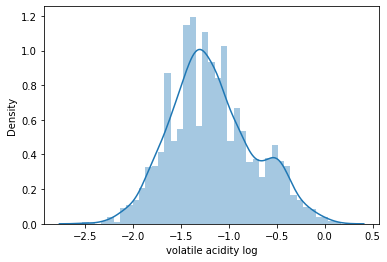

In [123]:
df['volatile acidity log'] = np.log(df['volatile acidity'])
sns.distplot(df['volatile acidity log'].dropna())

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual sugar log', ylabel='Density'>

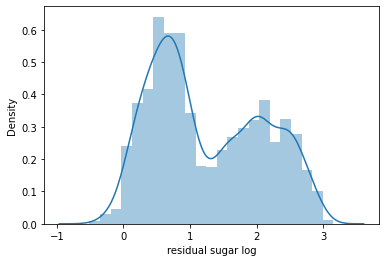

In [124]:
df['residual sugar log'] = np.log(df['residual sugar'])
sns.distplot(df['residual sugar log'].dropna())

0.7265229172945653
/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide sqrt', ylabel='Density'>

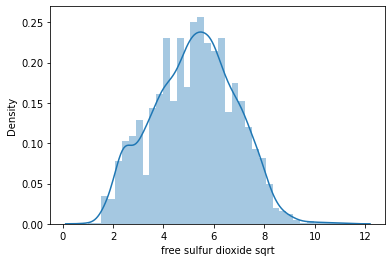

In [125]:
print(skew(df['free sulfur dioxide']))
df['free sulfur dioxide sqrt'] = np.sqrt(df['free sulfur dioxide'])
sns.distplot(df['free sulfur dioxide sqrt'].dropna())

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sulphates log', ylabel='Density'>

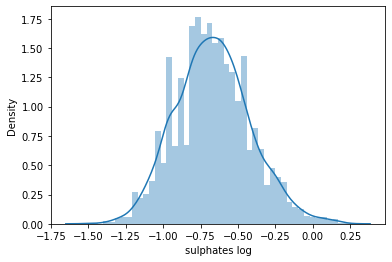

In [126]:
df['sulphates log'] = np.log(df['sulphates'])
sns.displot(df['sulphates log'].dropna())

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chlorides log', ylabel='Density'>

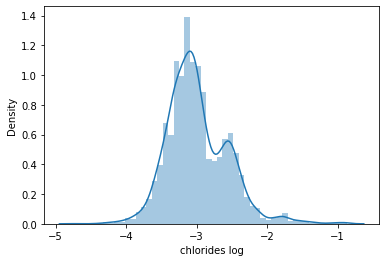

In [127]:
df['chlorides log'] = np.log(df['chlorides'])
sns.distplot(df['chlorides log'].dropna())

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol sqrt', ylabel='Density'>

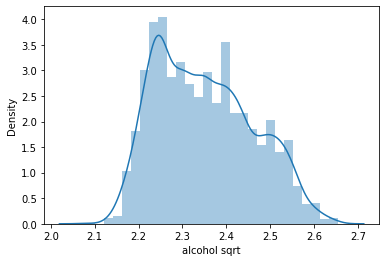

In [128]:
df['alcohol sqrt'] = np.log(df['alcohol'])
sns.distplot(df['alcohol sqrt'].dropna())

In [129]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,volatile acidity log,residual sugar log,free sulfur dioxide sqrt,sulphates log,chlorides log,alcohol sqrt
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,-1.309333,3.030134,6.708204,-0.798508,-3.101093,2.174752
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,-1.203973,0.470004,3.741657,-0.713350,-3.015935,2.251292
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,-1.272966,1.931521,5.477226,-0.820981,-2.995732,2.312535
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,-1.469676,2.140066,6.855655,-0.916291,-2.847312,2.292535
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white,-1.139434,1.945910,5.477226,-0.755023,-3.101093,2.261763


In [130]:
from scipy.stats import skew
print(skew(df['volatile acidity log']))
print(skew(df['residual sugar log']))
print(skew(df['free sulfur dioxide sqrt']))
print(skew(df['sulphates log']))
print(skew(df['chlorides log']))
print(skew(df['alcohol sqrt']))

0.30911687776349817
0.31366850282341835
-0.017112938734175152
0.2278853028559125
0.7875190920130138
0.35487509076639007


In [131]:
df = df.drop(['volatile acidity'], axis = 1)
df = df.drop(['residual sugar'], axis = 1)
df = df.drop(['free sulfur dioxide'], axis = 1)
df = df.drop(['sulphates'], axis = 1)
df = df.drop(['chlorides'], axis = 1)
df = df.drop(['alcohol'], axis = 1)

In [132]:
df.to_csv('file1.csv')

In [133]:
df = pd.read_csv('file1.csv', index_col='Unnamed: 0')

In [134]:
df.head()

,fixed acidity,citric acid,total sulfur dioxide,density,pH,quality,color,volatile acidity log,residual sugar log,free sulfur dioxide sqrt,sulphates log,chlorides log,alcohol sqrt
0,7.0,0.36,170.0,1.0010,3.00,6,white,-1.309333,3.030134,6.708204,-0.798508,-3.101093,2.174752
1,6.3,0.34,132.0,0.9940,3.30,6,white,-1.203973,0.470004,3.741657,-0.713350,-3.015935,2.251292
2,8.1,0.40,97.0,0.9951,3.26,6,white,-1.272966,1.931521,5.477226,-0.820981,-2.995732,2.312535
3,7.2,0.32,186.0,0.9956,3.19,6,white,-1.469676,2.140066,6.855655,-0.916291,-2.847312,2.292535
6,6.2,0.16,136.0,0.9949,3.18,6,white,-1.139434,1.945910,5.477226,-0.755023,-3.101093,2.261763


In [135]:
df.isnull().sum()

fixed acidity               0
citric acid                 0
total sulfur dioxide        0
density                     0
pH                          0
quality                     0
color                       0
volatile acidity log        0
residual sugar log          0
free sulfur dioxide sqrt    0
sulphates log               0
chlorides log               0
alcohol sqrt                0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='quality'>

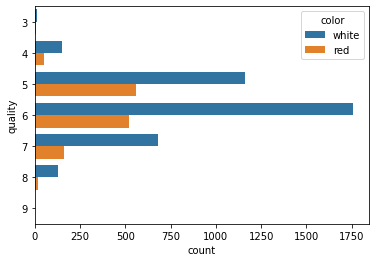

In [136]:
sns.countplot(y='quality', data=df, hue='color')

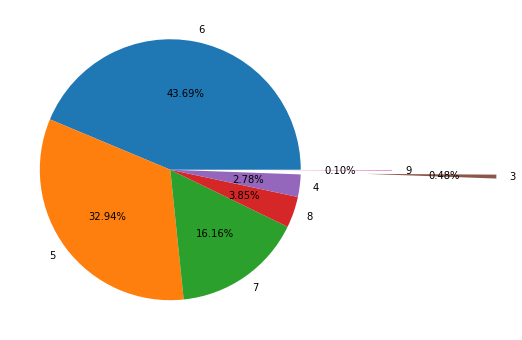

In [137]:
plt.figure(figsize=(7,6))
plt.pie(df['quality'].value_counts(), labels=df['quality'].unique(), autopct='%0.2f%%', explode=(0,0,0,0,0,1.5,0.7))
plt.show()

#### One hot encoding of color feature

In [138]:
df = pd.get_dummies(df, drop_first=True)

In [139]:
df

,fixed acidity,citric acid,total sulfur dioxide,density,pH,quality,volatile acidity log,residual sugar log,free sulfur dioxide sqrt,sulphates log,chlorides log,alcohol sqrt,color_white
0,7.0,0.36,170.0,1.00100,3.00,6,-1.309333,3.030134,6.708204,-0.798508,-3.101093,2.174752,1
1,6.3,0.34,132.0,0.99400,3.30,6,-1.203973,0.470004,3.741657,-0.713350,-3.015935,2.251292,1
2,8.1,0.40,97.0,0.99510,3.26,6,-1.272966,1.931521,5.477226,-0.820981,-2.995732,2.312535,1
3,7.2,0.32,186.0,0.99560,3.19,6,-1.469676,2.140066,6.855655,-0.916291,-2.847312,2.292535,1
6,6.2,0.16,136.0,0.99490,3.18,6,-1.139434,1.945910,5.477226,-0.755023,-3.101093,2.261763,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.08,38.0,0.99651,3.42,6,-0.478036,0.641854,5.291503,-0.198451,-2.688248,2.251292,0
1594,6.2,0.08,44.0,0.99490,3.45,5,-0.510826,0.693147,5.656854,-0.544727,-2.407946,2.351375,0
1595,5.9,0.10,51.0,0.99512,3.52,6,-0.597837,0.788457,6.244998,-0.274437,-2.780621,2.415914,0
1597,5.9,0.12,44.0,0.99547,3.57,5,-0.438505,0.693147,5.656854,-0.342490,-2.590267,2.322388,0


In [140]:
X = df.drop(columns=["color_white"], axis=1)
y = df.color_white

In [141]:
X.head()

,fixed acidity,citric acid,total sulfur dioxide,density,pH,quality,volatile acidity log,residual sugar log,free sulfur dioxide sqrt,sulphates log,chlorides log,alcohol sqrt
0,7.0,0.36,170.0,1.0010,3.00,6,-1.309333,3.030134,6.708204,-0.798508,-3.101093,2.174752
1,6.3,0.34,132.0,0.9940,3.30,6,-1.203973,0.470004,3.741657,-0.713350,-3.015935,2.251292
2,8.1,0.40,97.0,0.9951,3.26,6,-1.272966,1.931521,5.477226,-0.820981,-2.995732,2.312535
3,7.2,0.32,186.0,0.9956,3.19,6,-1.469676,2.140066,6.855655,-0.916291,-2.847312,2.292535
6,6.2,0.16,136.0,0.9949,3.18,6,-1.139434,1.945910,5.477226,-0.755023,-3.101093,2.261763


In [142]:
y

0       1
1       1
2       1
3       1
6       1
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: color_white, Length: 5218, dtype: uint8

#### Splitting the dataset into training and testing datasets

In [148]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle=True)
'''
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.3, random_state = 42)
for train_index, test_index in split.split(df3, df3['color_white']):
    strat_train_set = df3.loc[train_index]
    strat_test_set = df3.loc[test_index]
    '''

"\nsplit = StratifiedShuffleSplit(n_splits=1, test_size = 0.3, random_state = 42)\nfor train_index, test_index in split.split(df3, df3['color_white']):\n    strat_train_set = df3.loc[train_index]\n    strat_test_set = df3.loc[test_index]\n    "

In [149]:
X_train.shape

(3652, 12)

In [150]:
X_test.shape

(1566, 12)

In [151]:
y_train.shape

(3652,)

In [152]:
y_test.shape

(1566,)

In [153]:
from collections import Counter
Counter(y_train)

Counter({1: 2745, 0: 907})

In [154]:
Counter(y_test)

Counter({1: 1158, 0: 408})

#### Building a LogisticRegression model

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/home/vishesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
predictions = logmodel.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [159]:
print(confusion_matrix(y_test, predictions))
print()
print("accuracy score : ", str(accuracy_score(y_test, predictions)*100))
print()
print(classification_report(y_test, predictions))

[[ 398   10]
 [   6 1152]]

accuracy score :  98.97828863346105

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       408
           1       0.99      0.99      0.99      1158

    accuracy                           0.99      1566
   macro avg       0.99      0.99      0.99      1566
weighted avg       0.99      0.99      0.99      1566



The Logistic Regression model is giving a high accuracy, high precision and good results in the confusion matrix

In [160]:
print(y_test[98], " : ", predictions[98])

1  :  1


In [161]:
print(y_test[187], " : ", predictions[187])

1  :  1


In [162]:
print(y_test[569], " : ", predictions[569])

0  :  0


In [163]:
print(y_test[704], " : ", predictions[704])

1  :  1


#### Creating a RandomForestClassifier model

In [164]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [165]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print()
print("accuracy score : ", str(accuracy_score(y_test, y_pred)*100))
print()
print(classification_report(y_test, y_pred))

[[ 397   11]
 [   3 1155]]

accuracy score :  99.10600255427842

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       408
           1       0.99      1.00      0.99      1158

    accuracy                           0.99      1566
   macro avg       0.99      0.99      0.99      1566
weighted avg       0.99      0.99      0.99      1566



The Random Forest classifier model is giving a high accuracy, high precision and good results in the confusion matrix

In [166]:
print(y_test[98], " : ", y_pred[98])

1  :  1


In [167]:
print(y_test[183], " : ", y_pred[183])

0  :  0


In [168]:
print(y_test[283], " : ", y_pred[283])

1  :  1


In [169]:
print(y_test[33], " : ", y_pred[33])

0  :  0


In [170]:
print(y_test[441], " : ", y_pred[441])

1  :  1


#### Building SVM model

In [171]:
from sklearn import svm

In [172]:
cls = svm.SVC(kernel="linear")

In [173]:
cls.fit(X_train, y_train)

SVC(kernel='linear')

In [174]:
pred = cls.predict(X_test)

In [175]:
print(confusion_matrix(y_test, pred))
print()
print("accuracy score : ", str(accuracy_score(y_test, pred)*100))
print()
print(classification_report(y_test, pred))

[[ 399    9]
 [   6 1152]]

accuracy score :  99.04214559386973

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       408
           1       0.99      0.99      0.99      1158

    accuracy                           0.99      1566
   macro avg       0.99      0.99      0.99      1566
weighted avg       0.99      0.99      0.99      1566



The SVM model is giving a high accuracy, high precision and good results in the confusion matrix

#### Hyperparameter tuning

In [176]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [177]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [178]:
from sklearn.model_selection import RandomizedSearchCV

In [179]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [180]:
rfc = RandomForestClassifier()
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'accuracy', n_iter = 10, cv = 5, random_state = 42, verbose = 2)

In [181]:
#rsc.fit(X_train, y_train)

In [182]:
'''
prediction = rsc.predict(X_test)
prediction
'''

'\nprediction = rsc.predict(X_test)\nprediction\n'

In [183]:
#y_test

In [184]:
#rsc.best_params_

In [185]:
#print(y_test[1303], " : ", prediction[1303])

In [186]:
#print(y_test[703], " : ", prediction[703])

In [187]:
#print(y_test[1029], " : ", prediction[1029])

In [188]:
'''
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, prediction))
'''

'\nprint(confusion_matrix(y_test, prediction))\nprint(accuracy_score(y_test, y_pred))\nprint(classification_report(y_test, prediction))\n'